In [80]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

Banknote mltp=0.5 has min_loss 0.01864746212959285 at 100 epochs (3.6600356101989737 ms)
Banknote mltp=1 has min_loss 0.00936328060925005 at 100 epochs (3.646834135055541 ms)
Banknote mltp=2 has min_loss 0.00449522933922705 at 100 epochs (3.654742717742919 ms)


CIFAR10 mltp=0.5 has min_loss 1.088472604751587 at 13 epochs (52.14211416244507 ms)
CIFAR10 mltp=1 has min_loss 1.0237115025520325 at 7 epochs (56.60909116268158 ms)
CIFAR10 mltp=2 has min_loss 1.0075373649597168 at 5 epochs (75.2034375667572 ms)


FashionMnist mltp=0.5 has min_loss 0.29352314770221705 at 12 epochs (89.35301232337952 ms)
FashionMnist mltp=1 has min_loss 0.2503704354166984 at 12 epochs (134.84900784492493 ms)
FashionMnist mltp=2 has min_loss 0.2356004267930984 at 8 epochs (154.1445153951645 ms)


Imdb mltp=0.5 has min_loss 0.27888503670692444 at 7 epochs (2.782248377799988 ms)
Imdb mltp=1 has min_loss 0.277440145611763 at 5 epochs (2.225405693054199 ms)
Imdb mltp=2 has min_loss 0.2767567634582519 at 3 epochs (1.

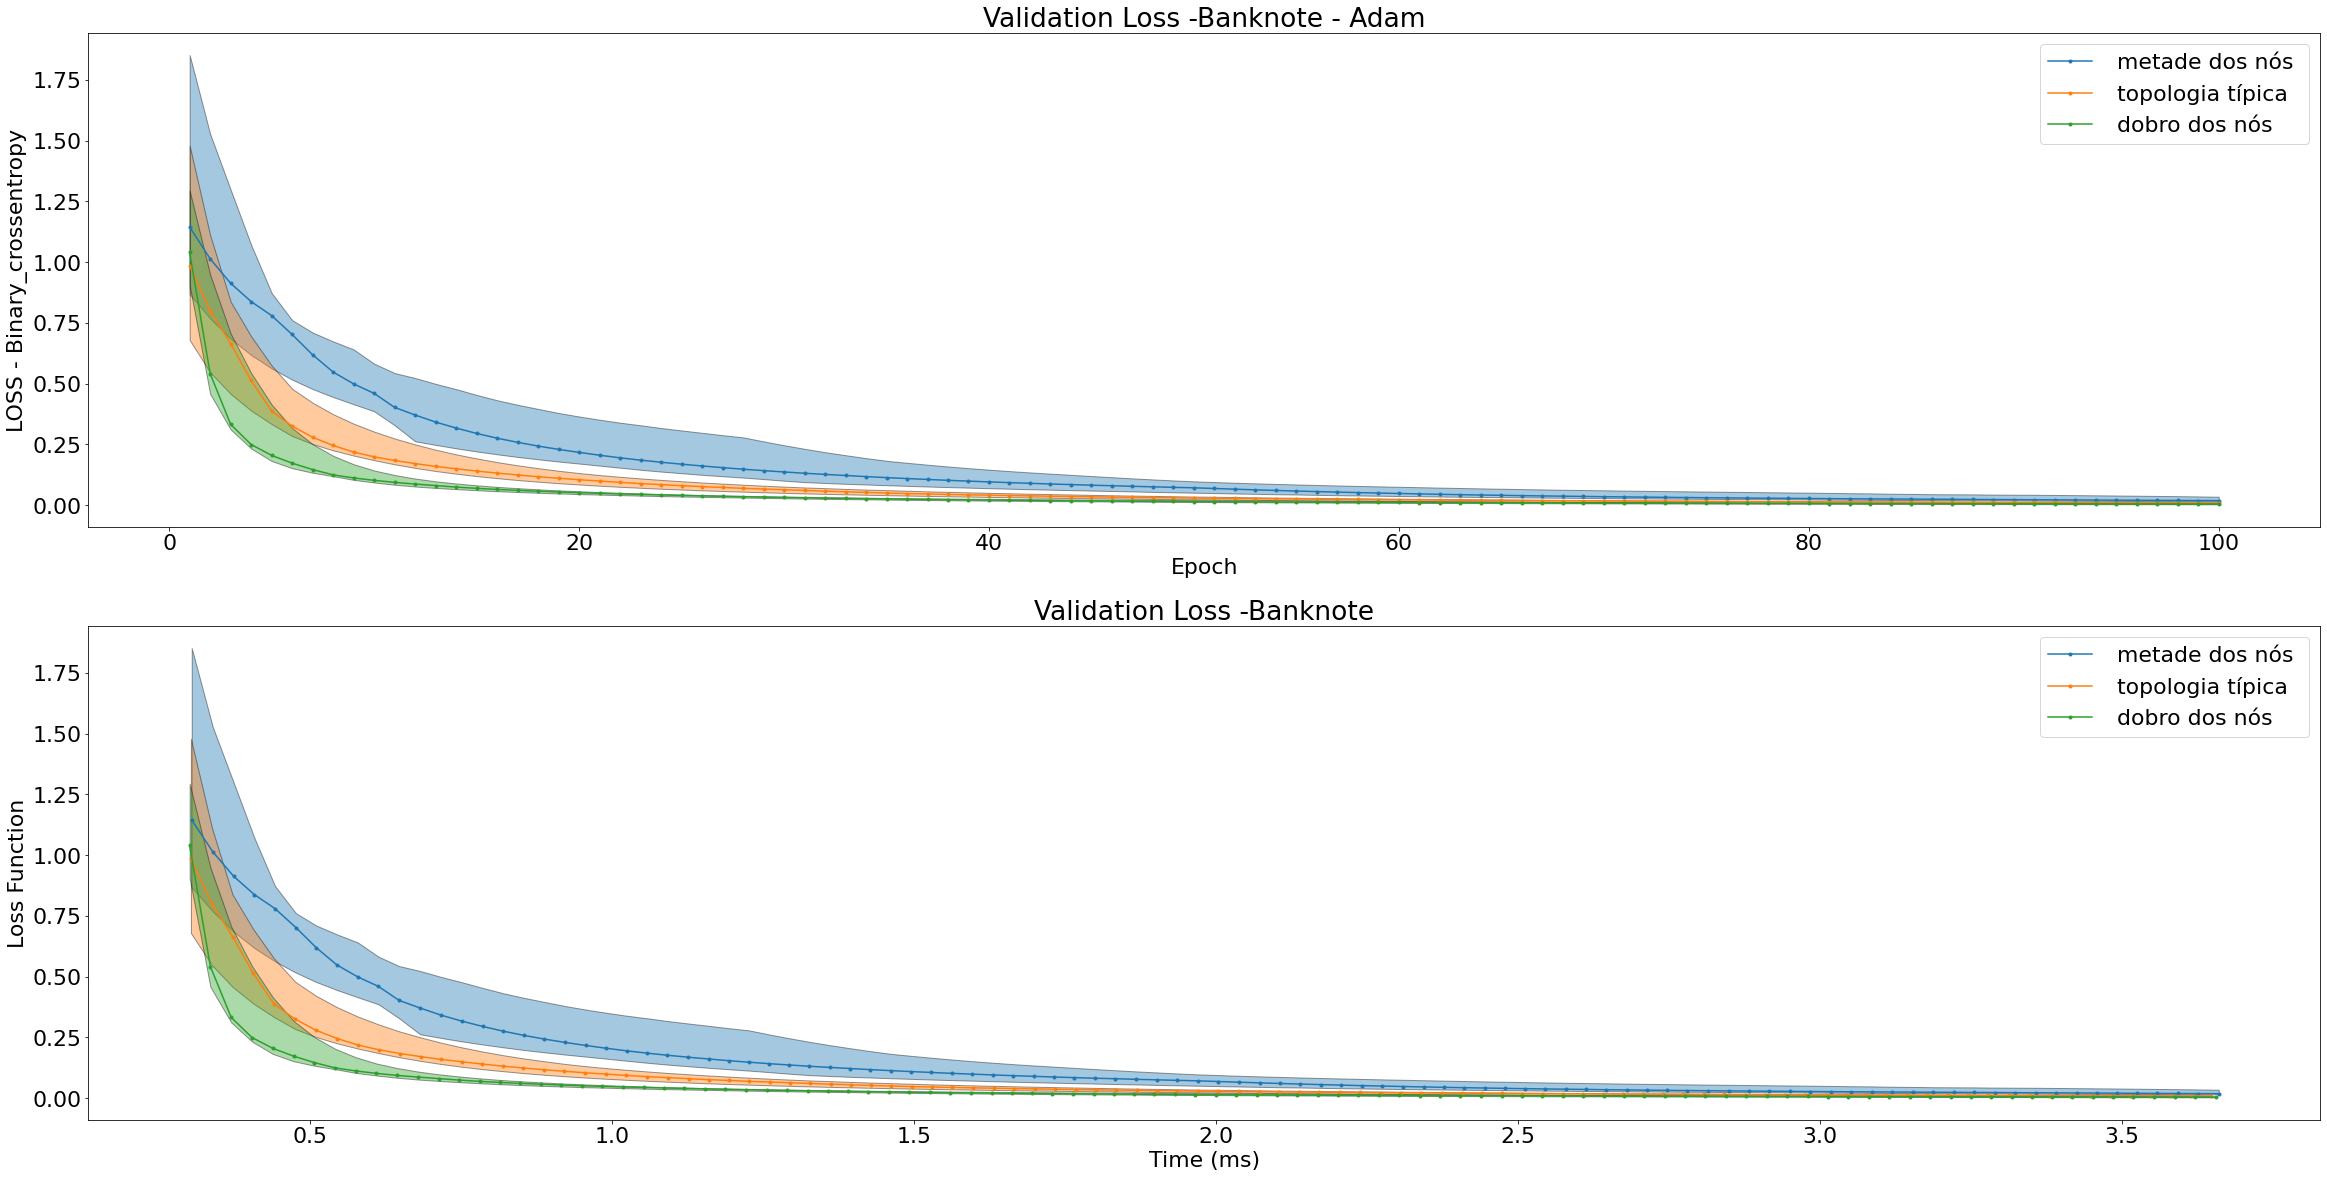

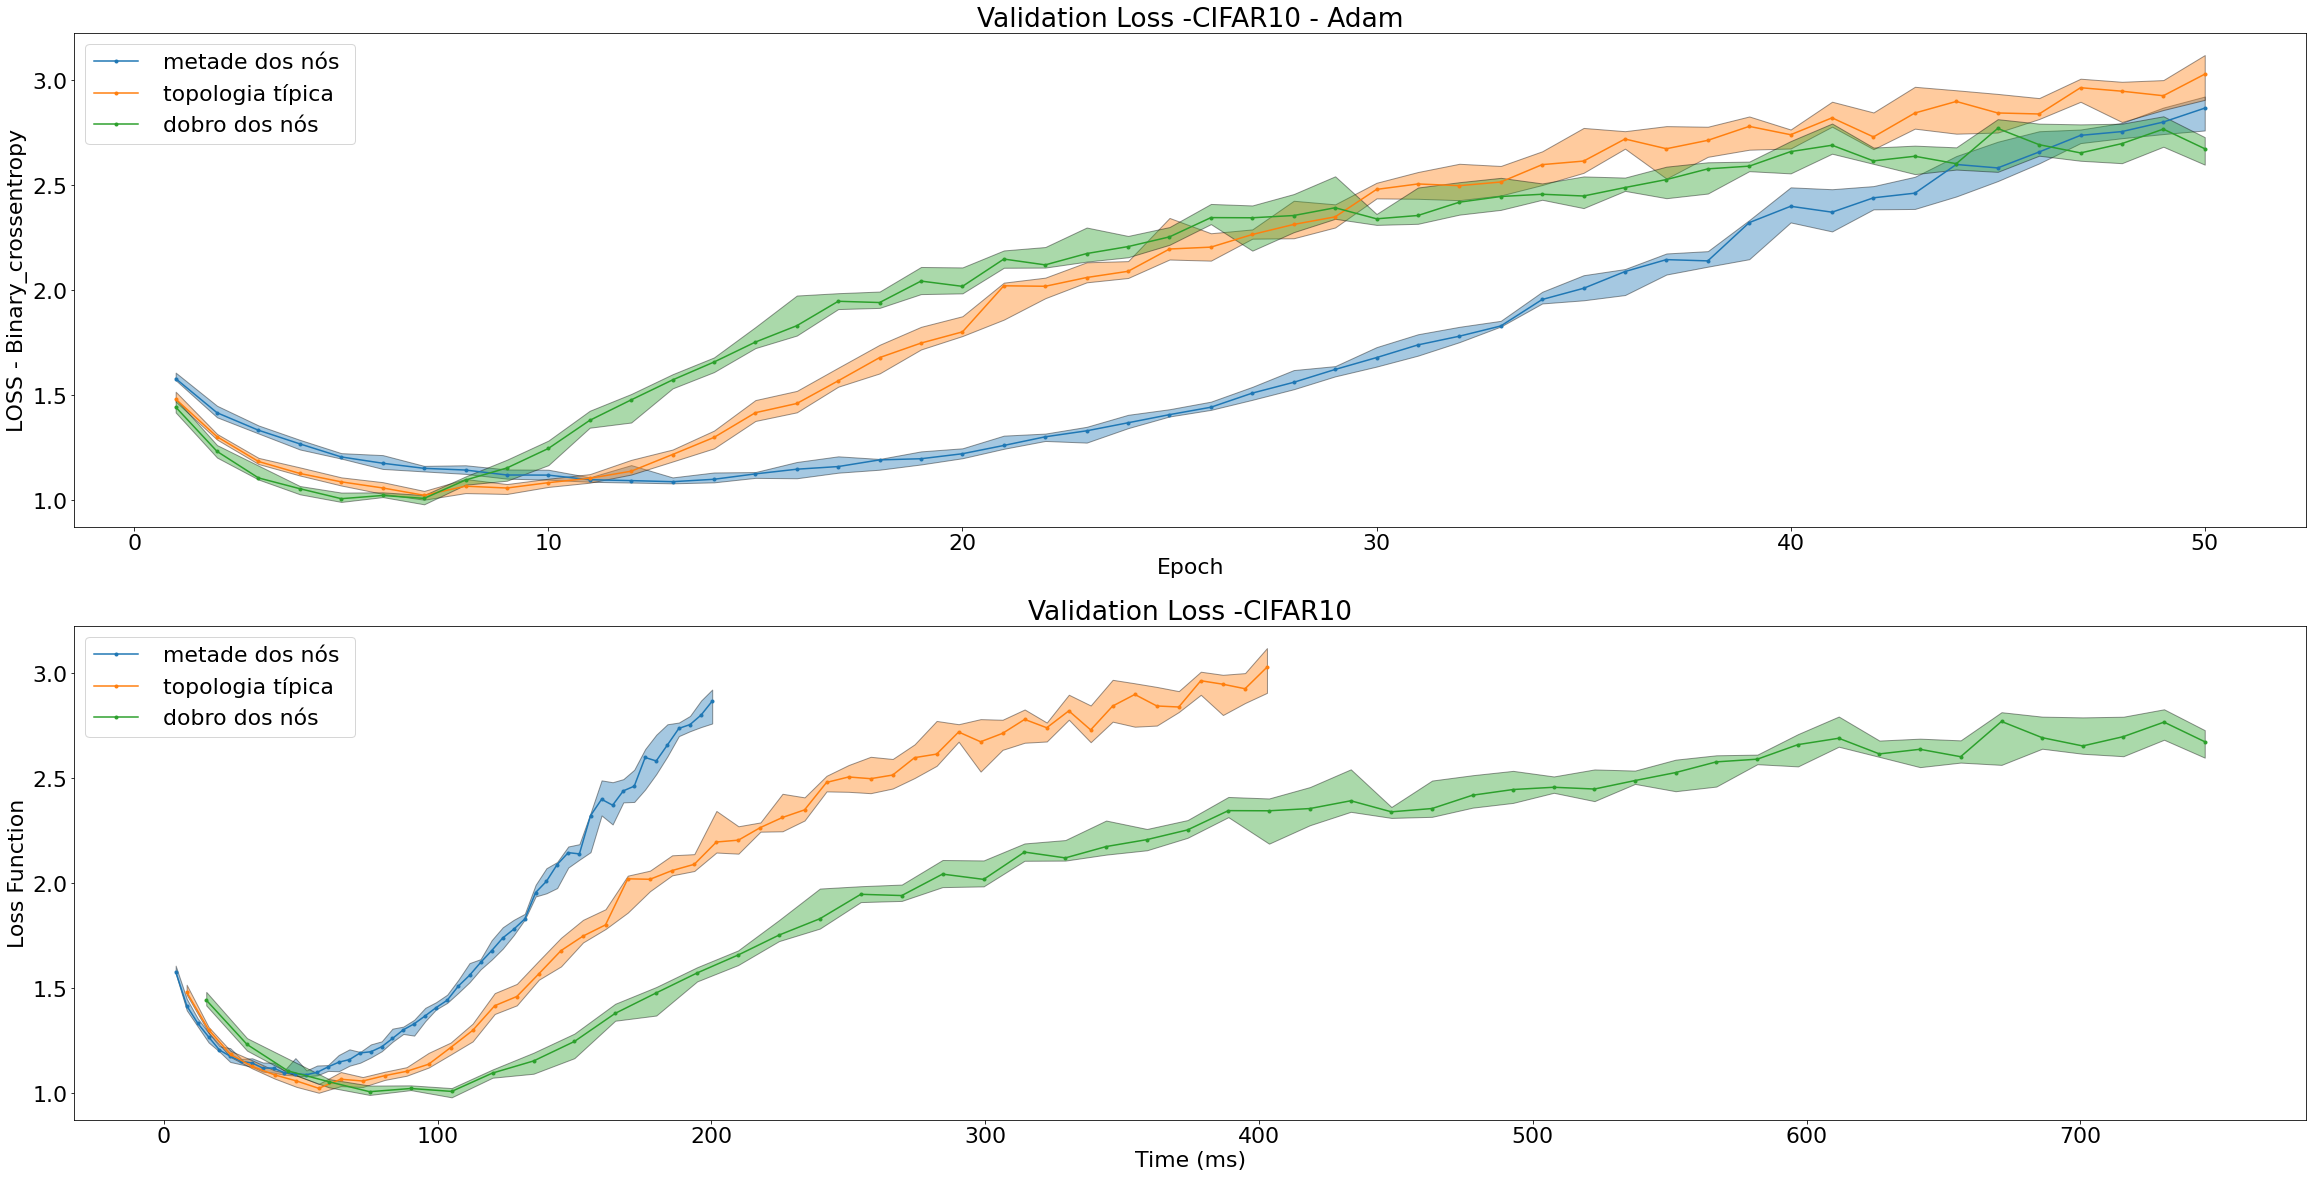

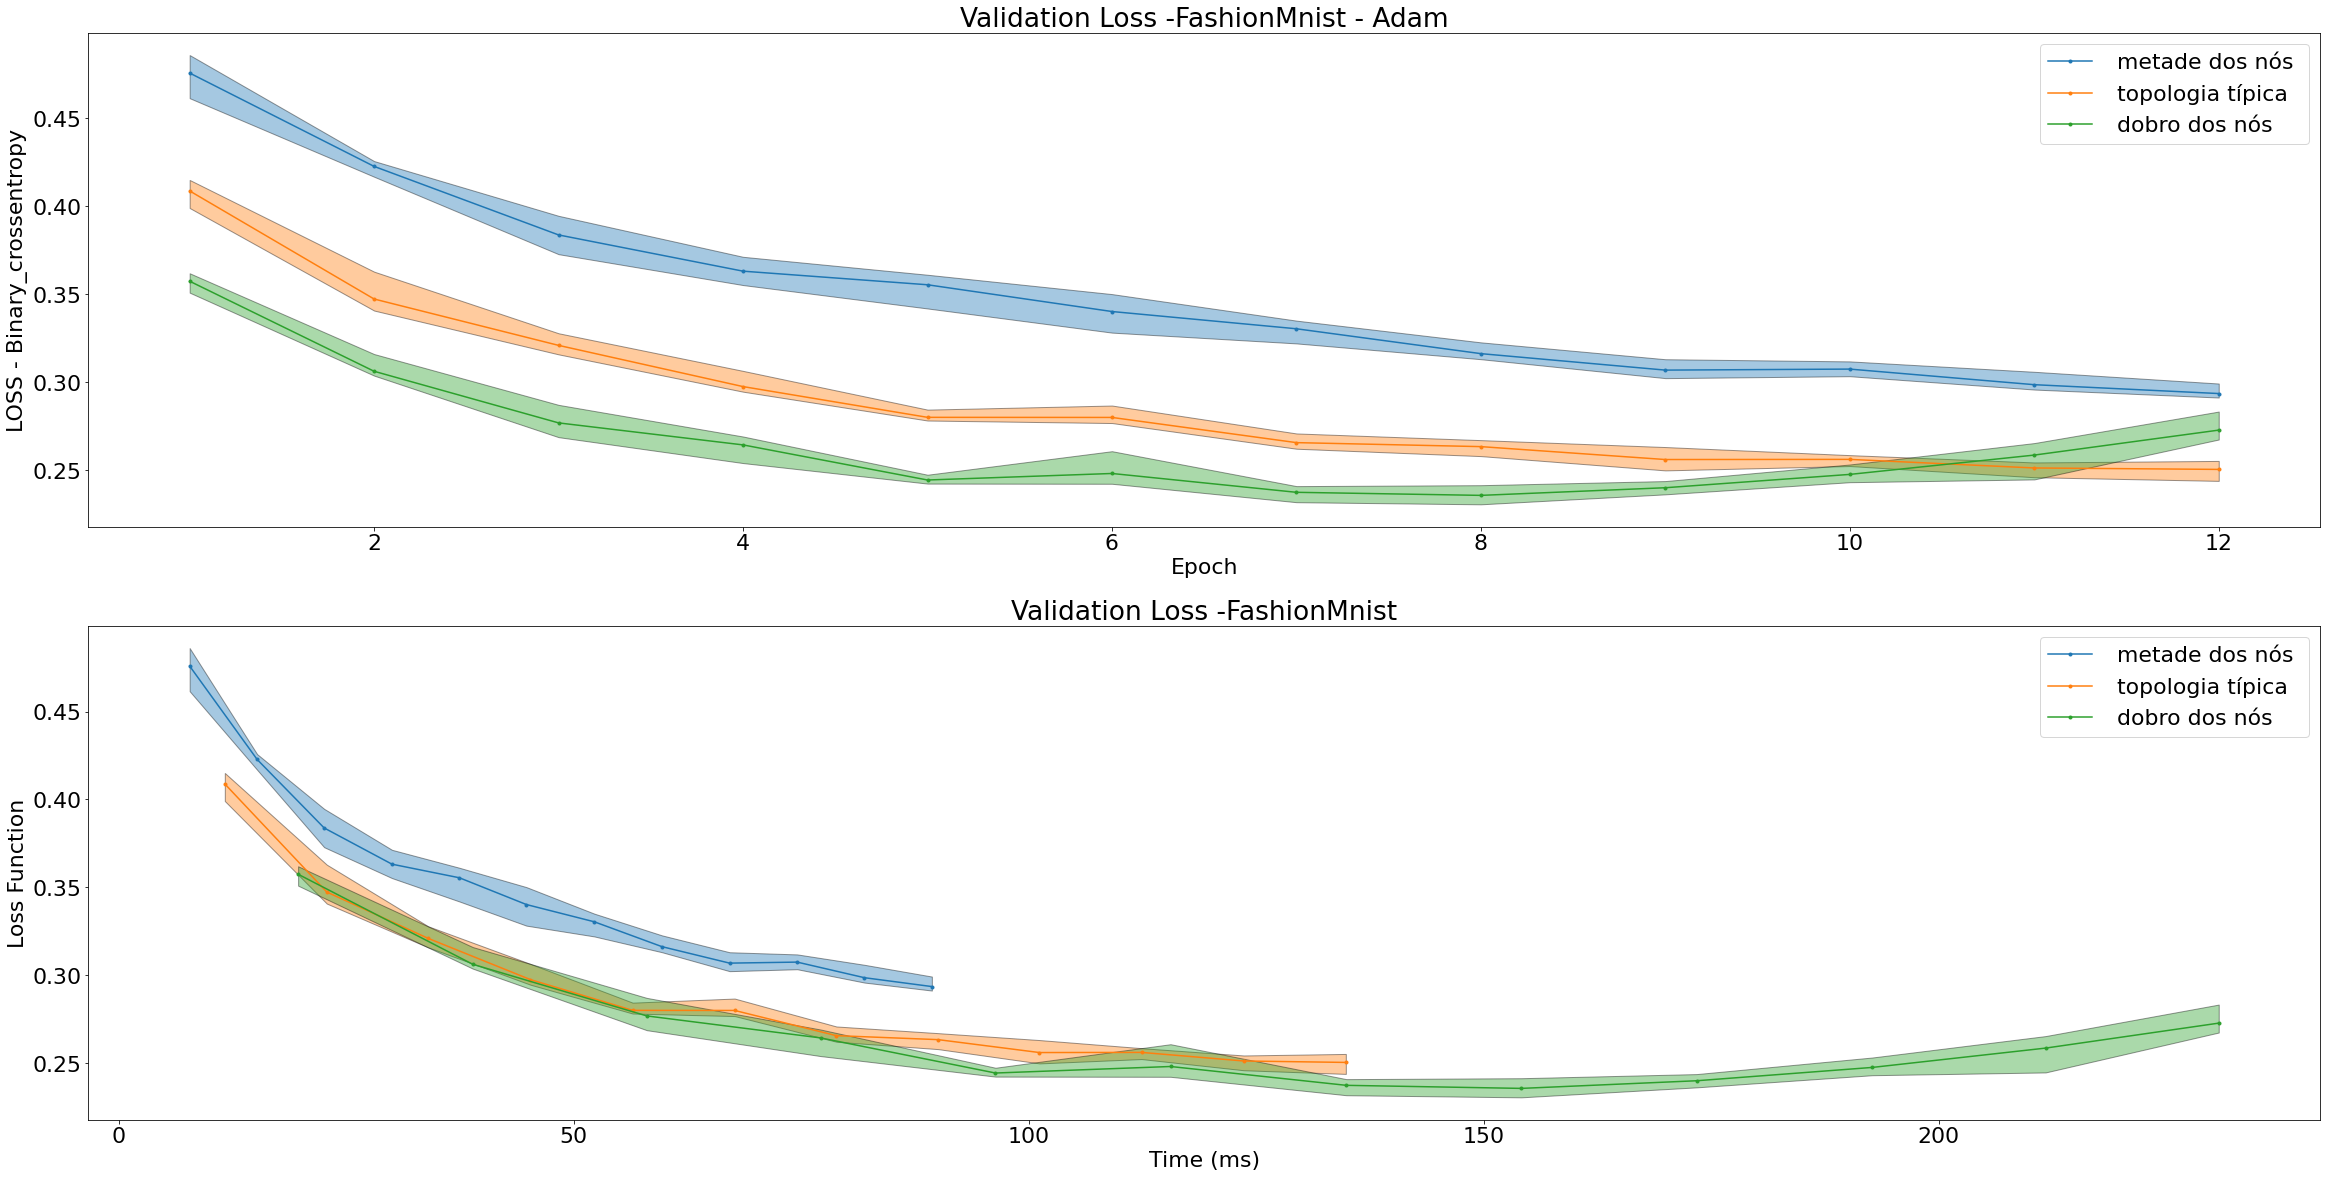

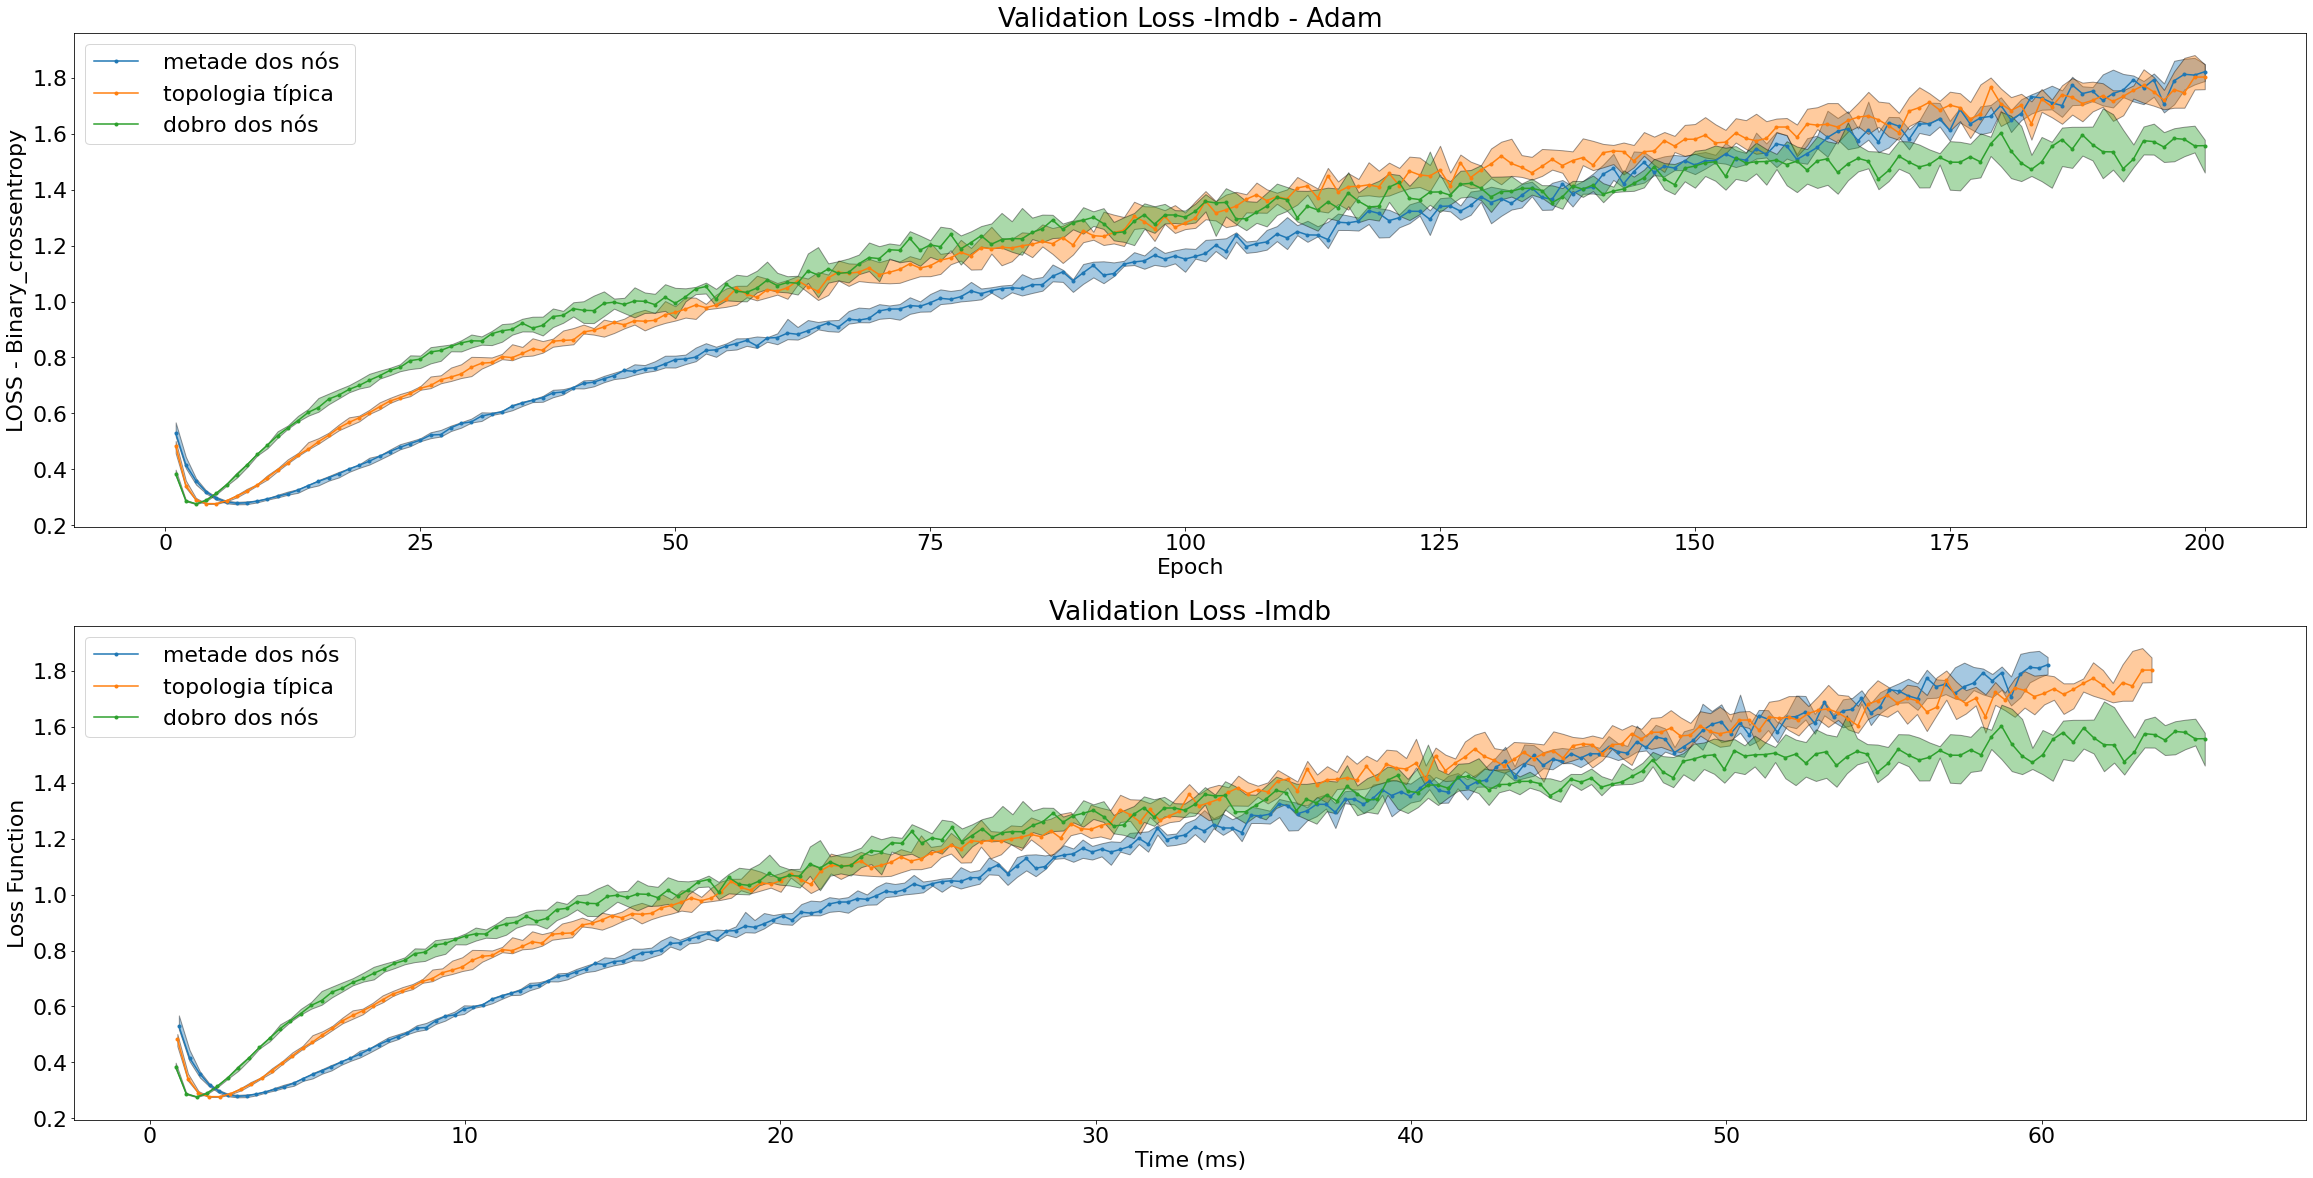

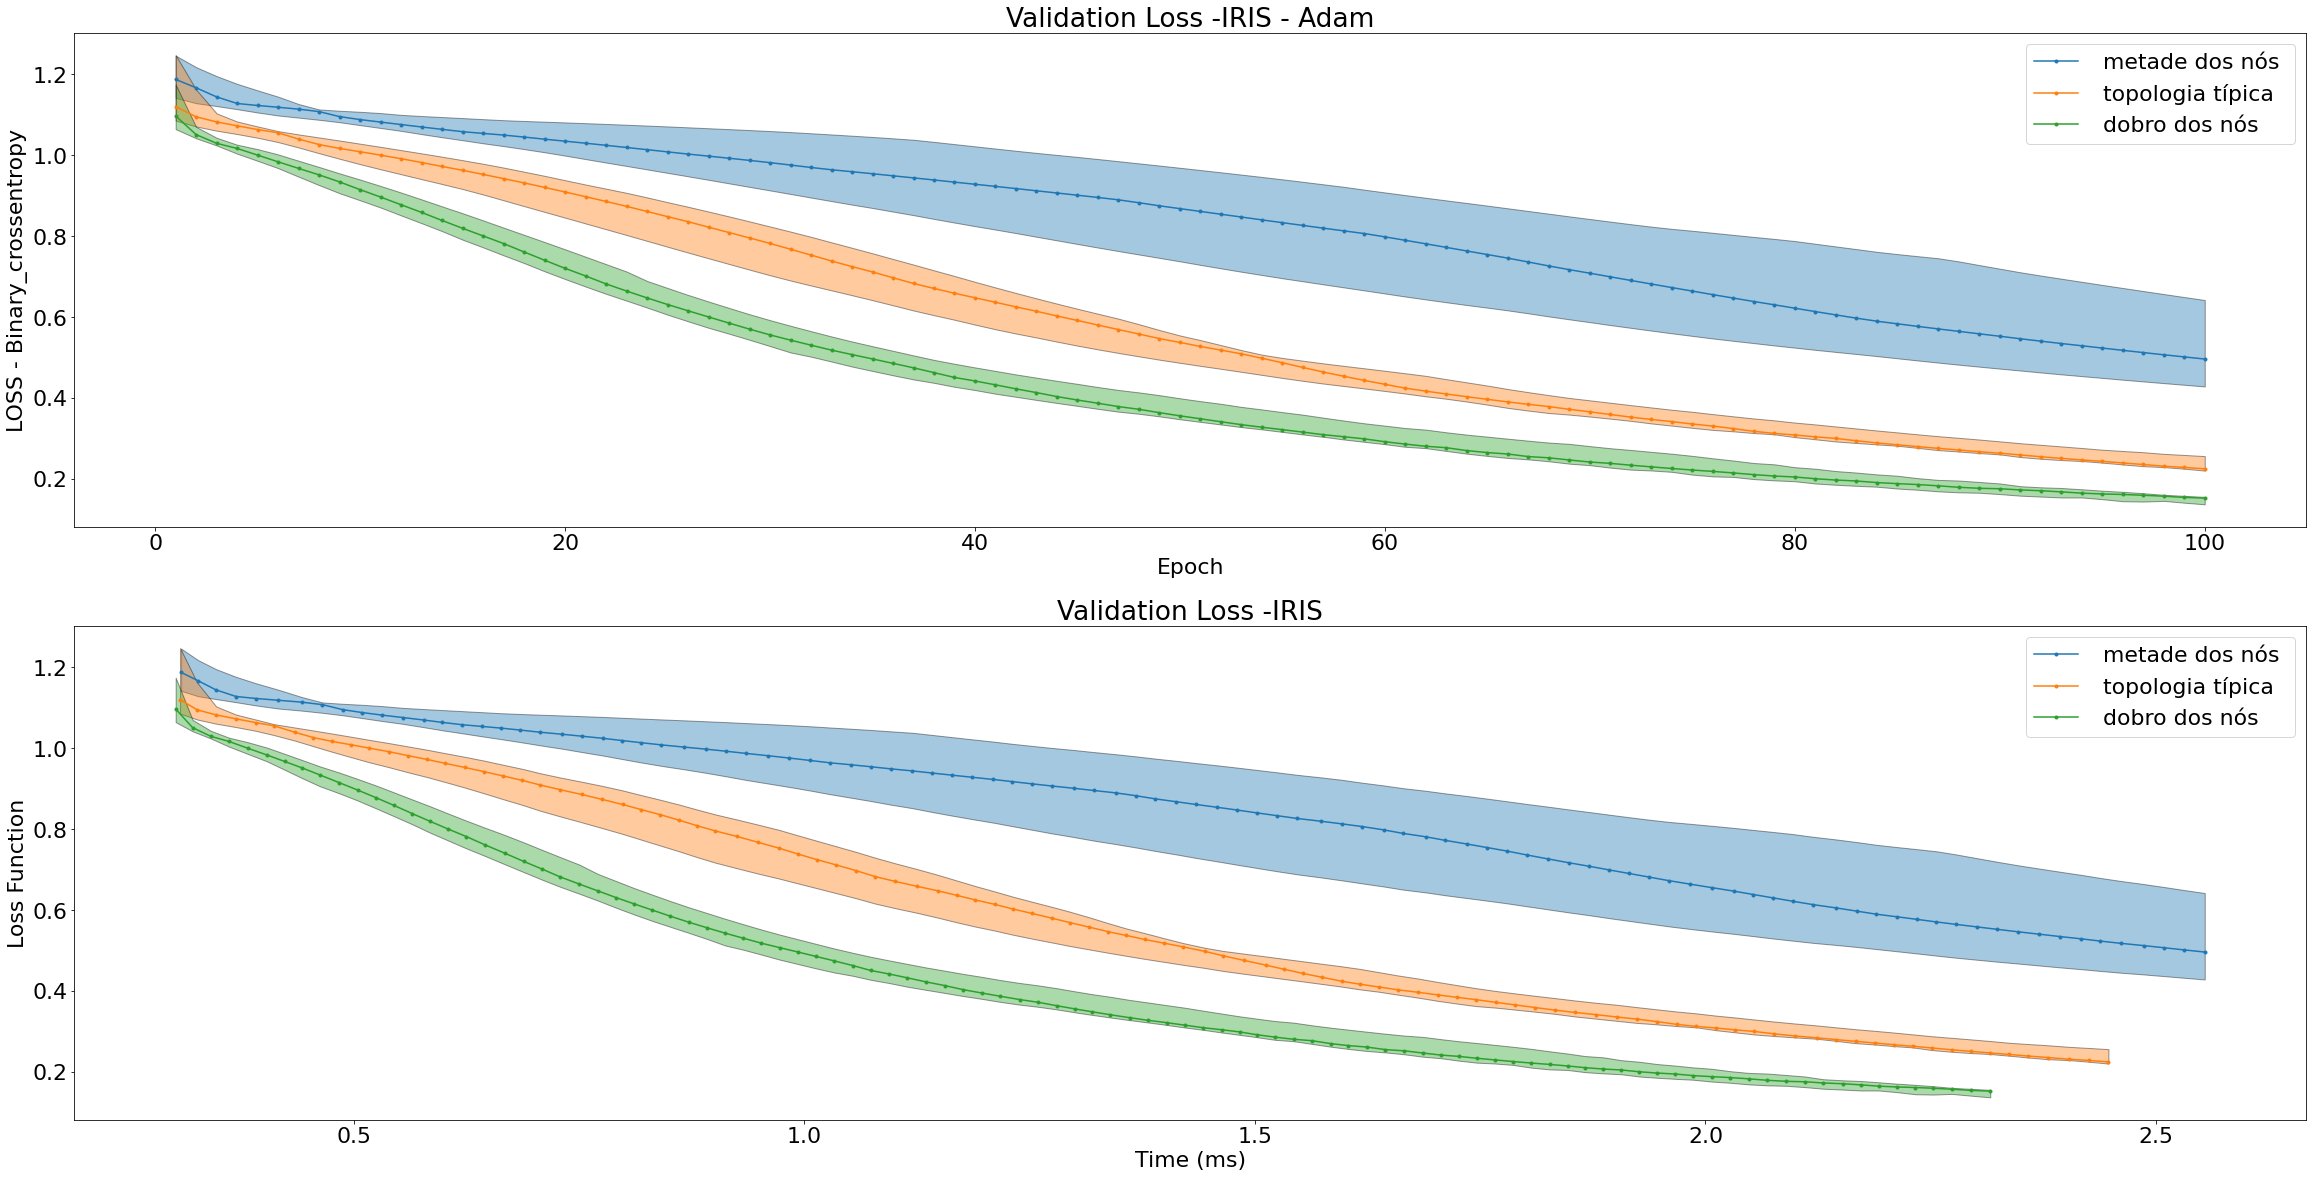

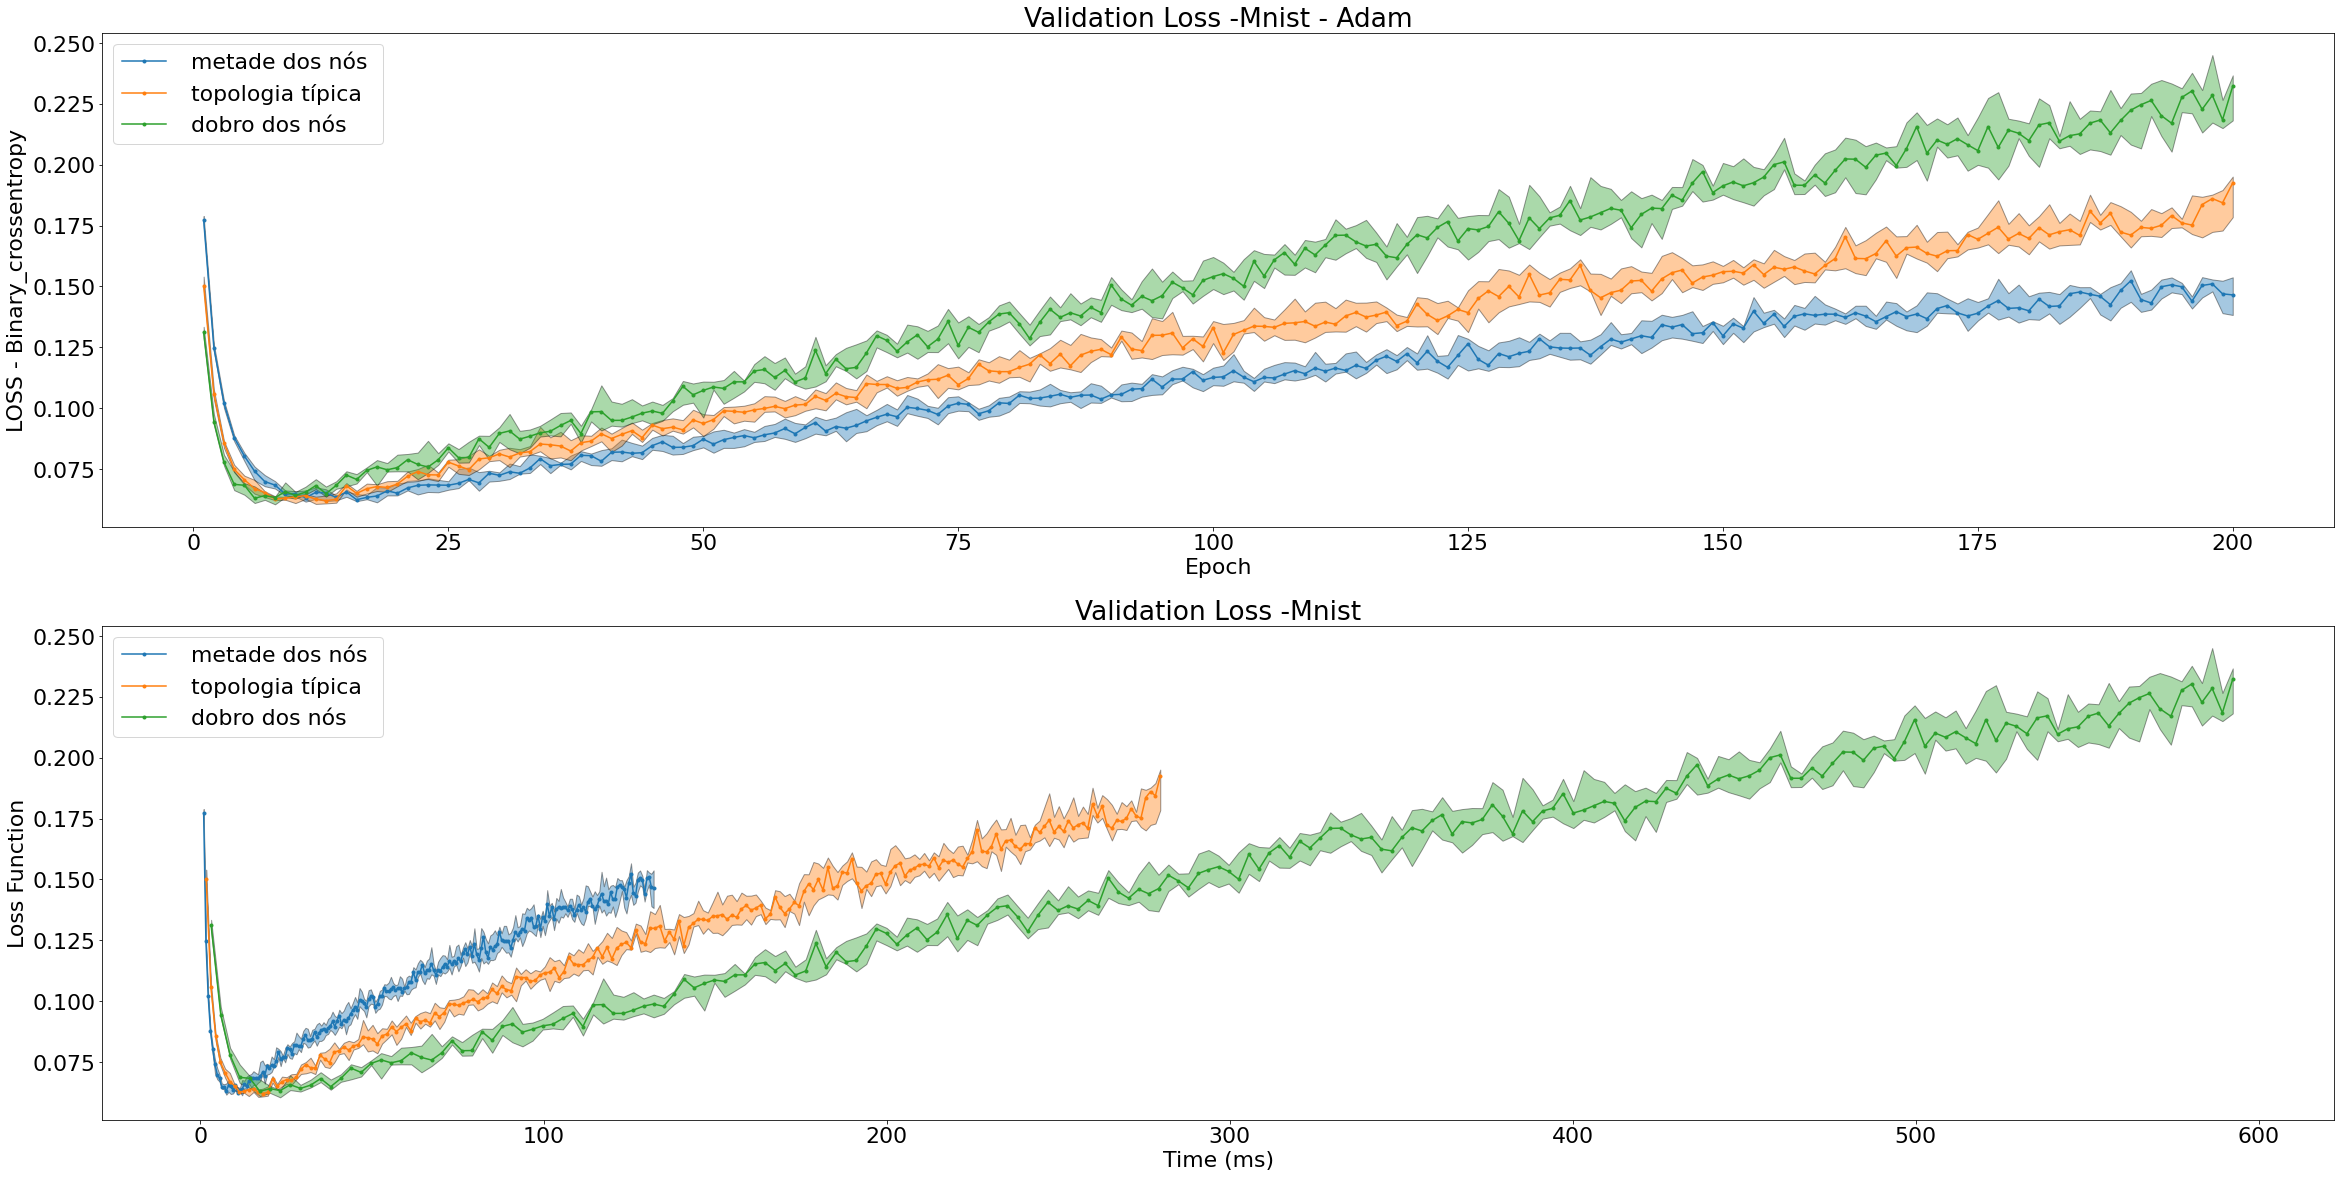

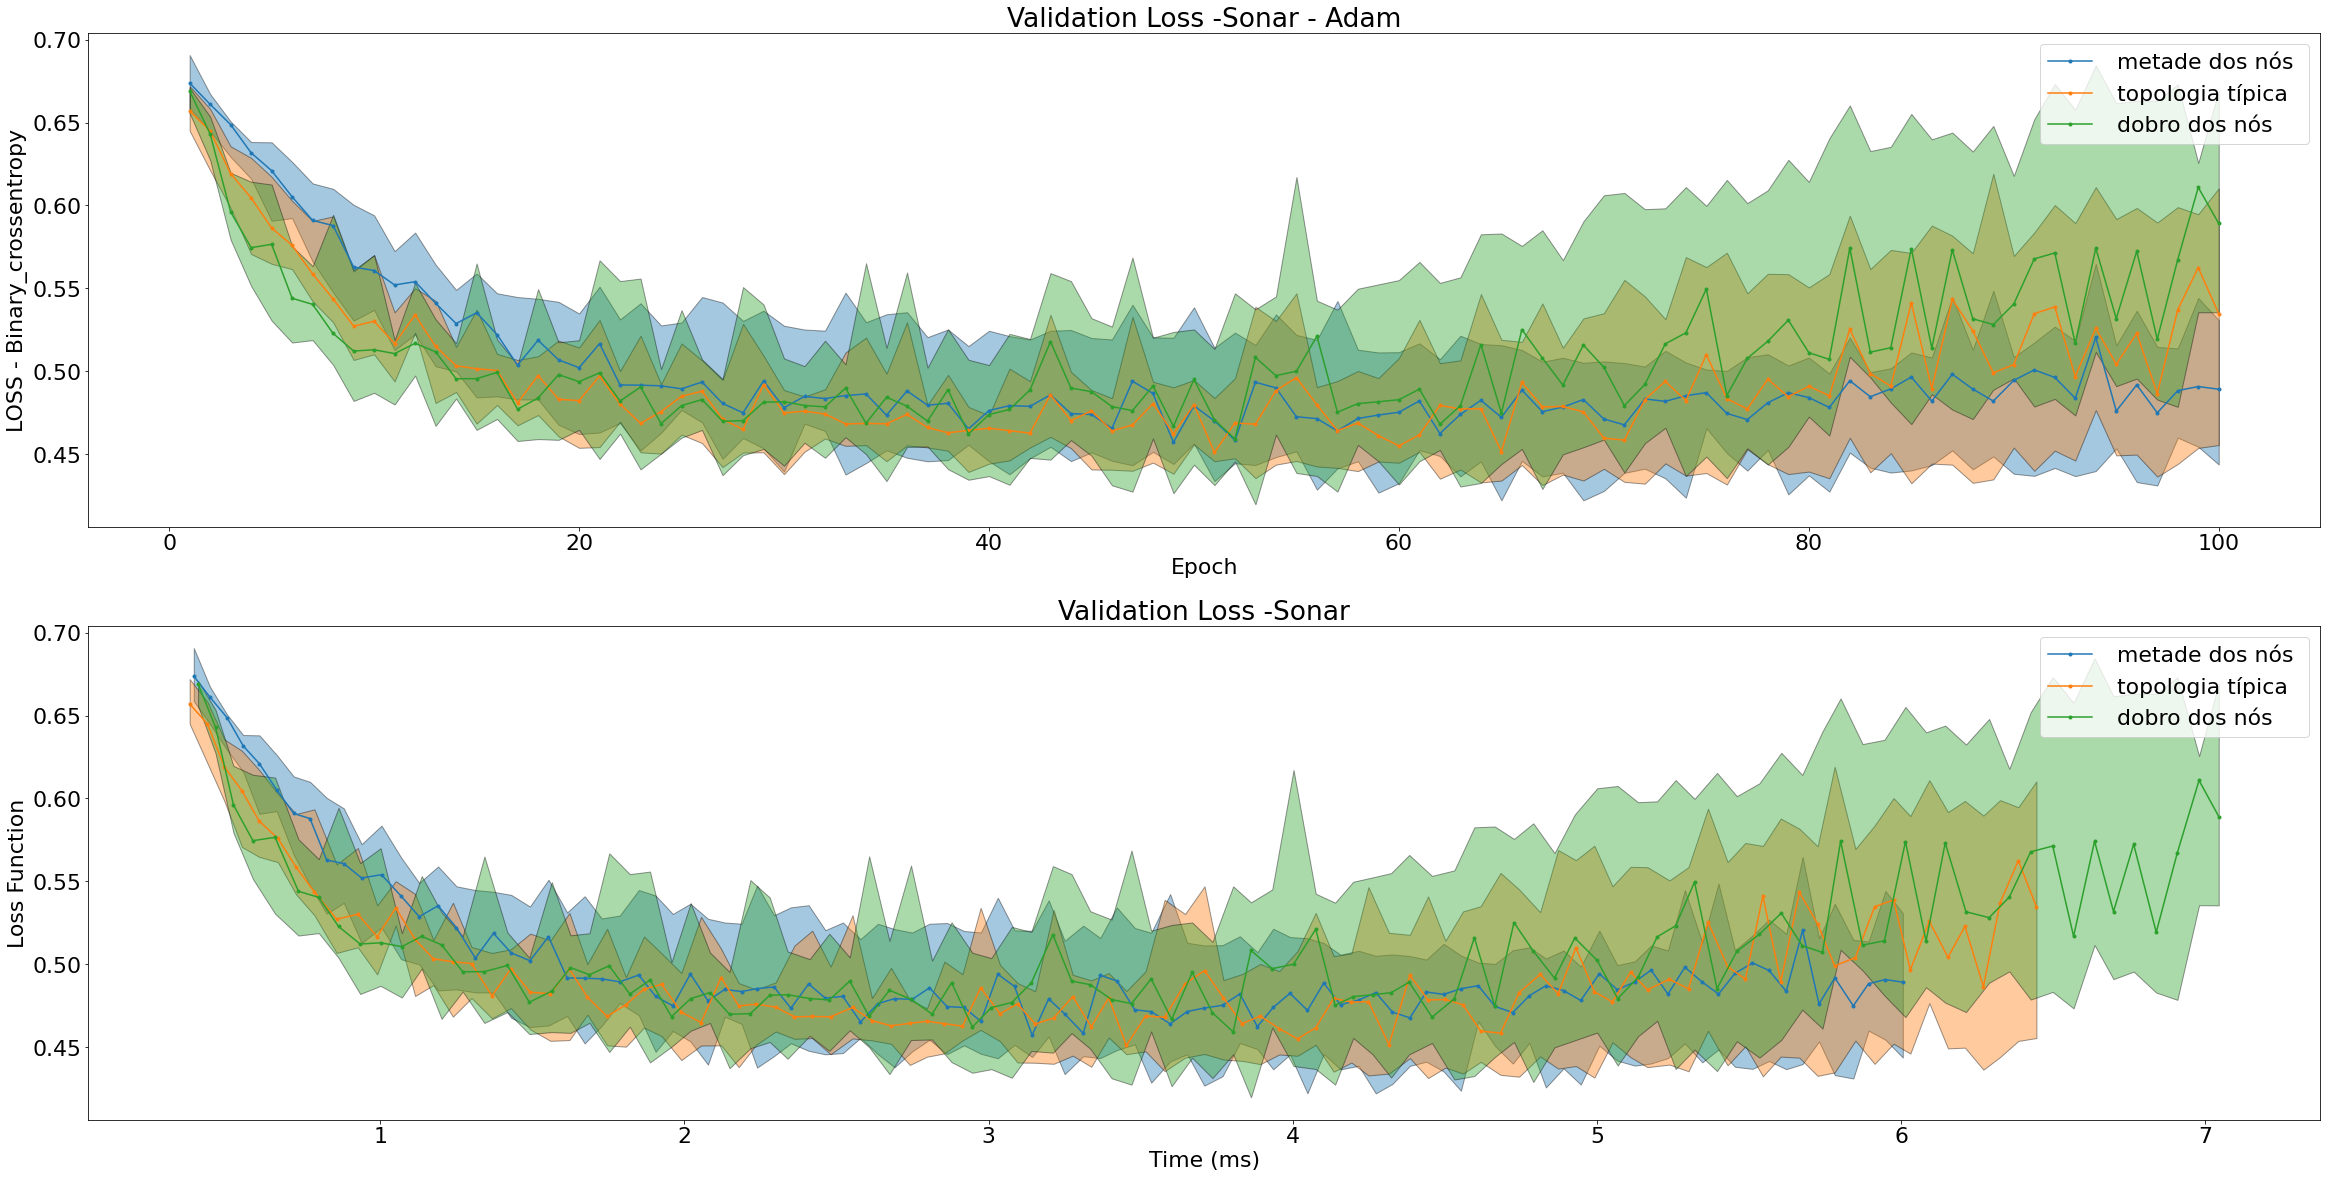

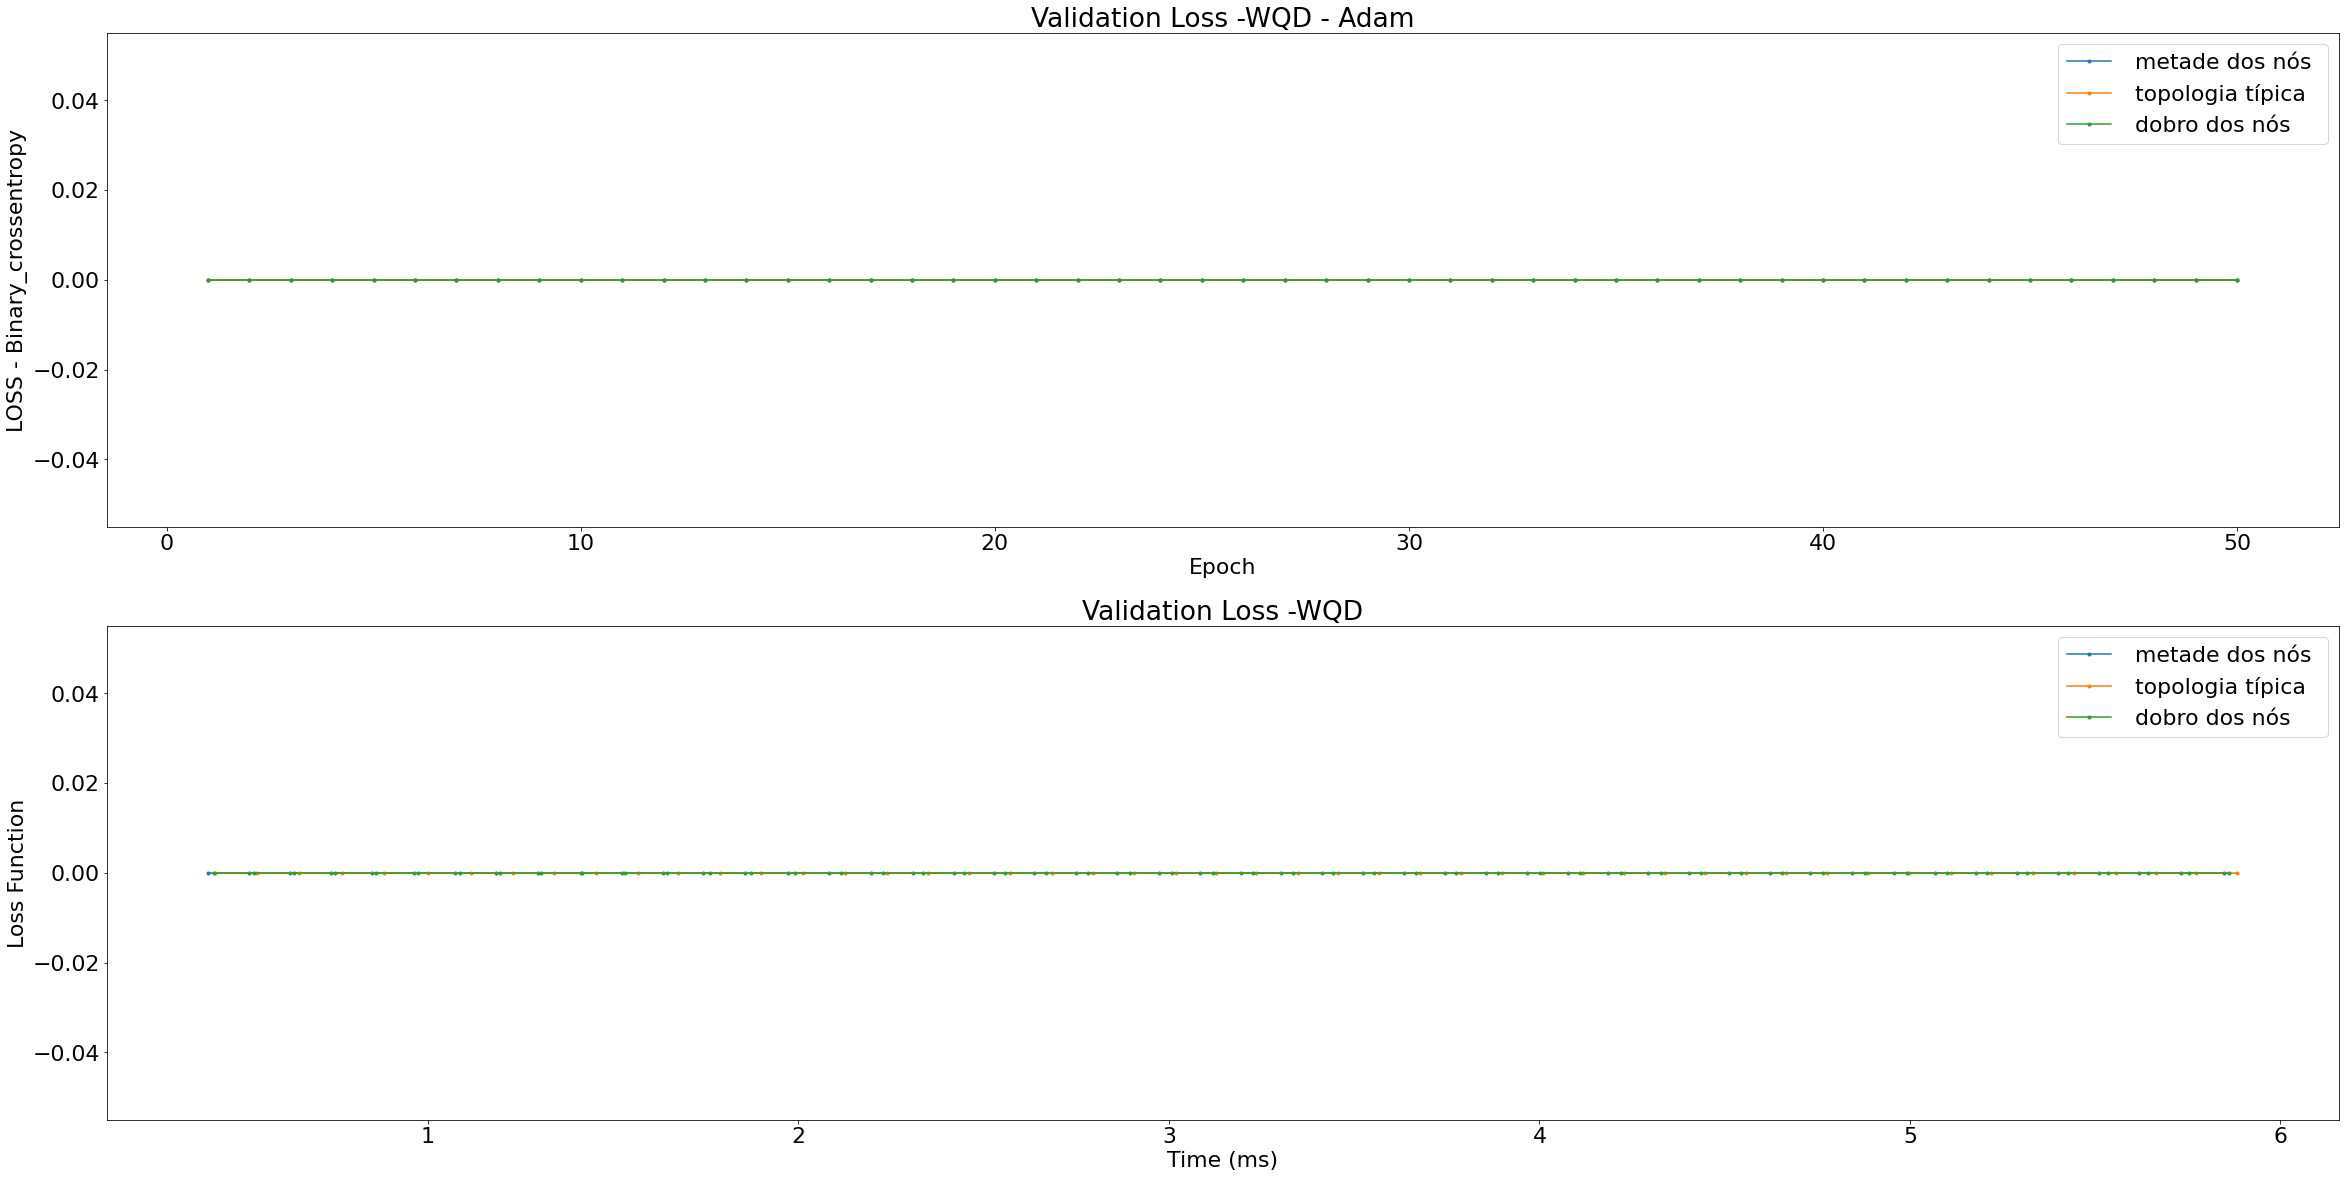

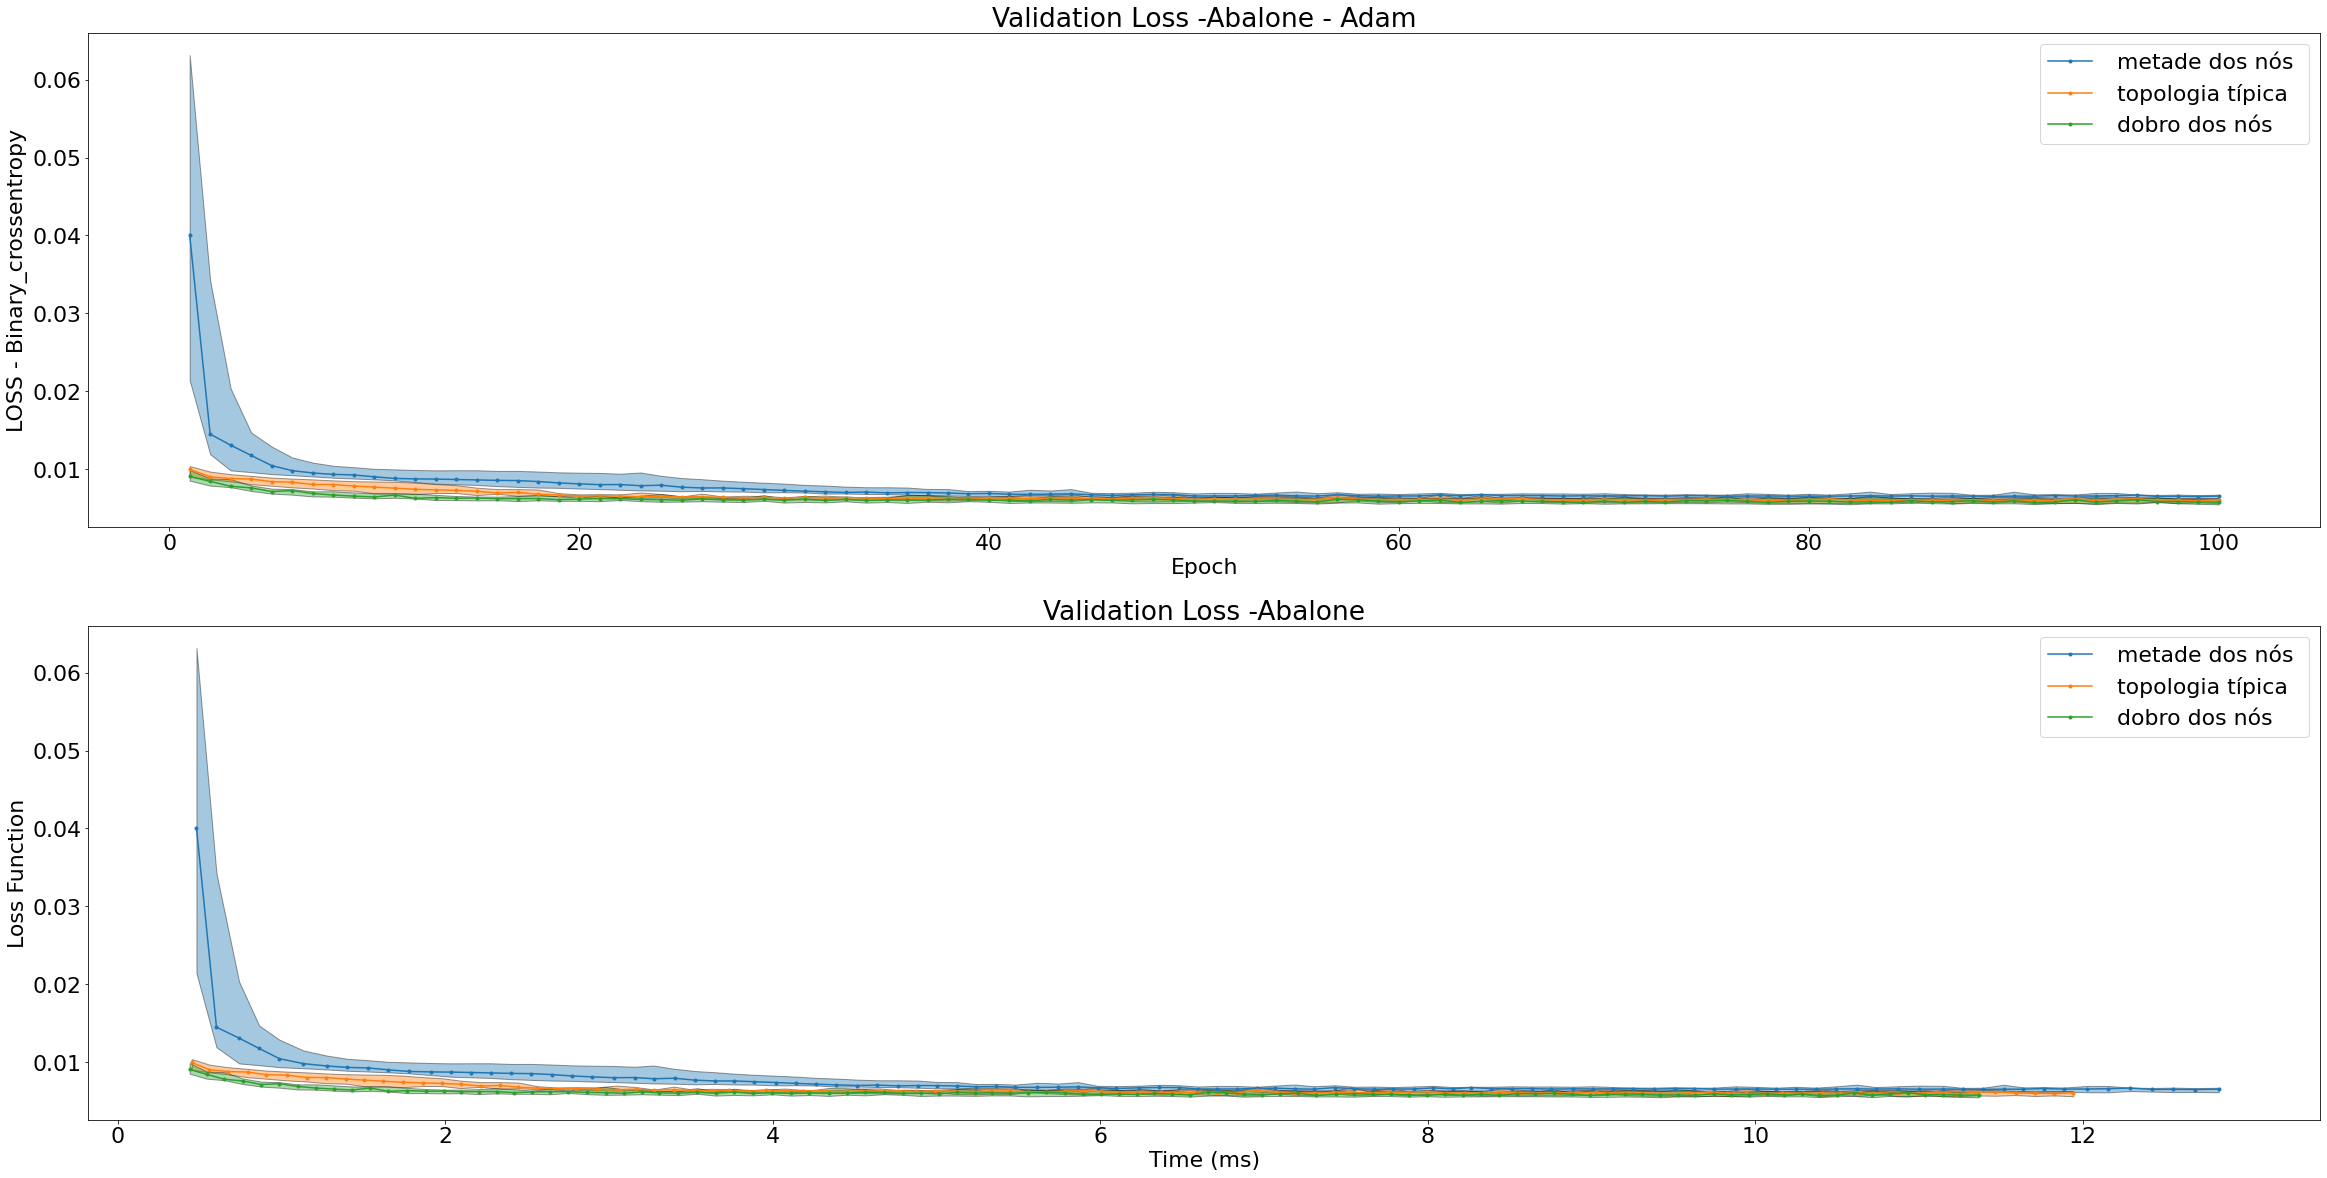

In [81]:
dataset=['Banknote','CIFAR10','FashionMnist','Imdb','IRIS','Mnist','Sonar','WQD','Abalone']

def new_name(data,mltp,seed="mean"):
    return data+"_"+str(mltp).replace(".","_")+"_seed_"+str(seed)

seeds = list(range(0,10))
multiply= [0.5,1,2]
dic_Vloss={}
dic_Tloss={}
dic_times={}
dic_Vloss_mean={}
dic_Tloss_mean={}
dic_times_mean={}

def label_name(mltp):
    if mltp==0.5:
        return " metade dos nós "
    if mltp==1:
        return " topologia típica "
    if mltp==2:
        return " dobro dos nós "
for d in dataset:
        
    for mltp in multiply:
        pepochs=500
        for actual_seed in seeds:
            filename =  ".\\" + d + "_seed_result/"+d+"_" + str(mltp) + "_" +str(actual_seed)+ ".csv"
            data = pd.read_csv(filename)

            epochs = data['epoch']
            if pepochs >len(epochs):
                pepochs=len(epochs)

            dic_Tloss[new_name(d,mltp,actual_seed)]=data['loss'].tolist()    #Trainig loss valeus
            dic_Vloss[new_name(d,mltp,actual_seed)]=data['val_loss'].tolist()  #Validation loss valeus
            dic_times[new_name(d,mltp,actual_seed)]=data['time'].tolist()  #Epeochs time  valeus
        
     #calculo da mediana e dos 1º e 3º quartis
    
    for mltp in multiply:
        
        dic_Vloss_mean[new_name(d,mltp)]=[]
        dic_times_mean[new_name(d,mltp)]=[]
        
        for step in list(range(0,pepochs)): 
            soma=[]
            tempos=[]
            for actual_seed in seeds:
                soma.append(dic_Vloss[new_name(d,mltp,actual_seed)][step])
                tempos.append(dic_times[new_name(d,mltp,actual_seed)][step])
            mediana= np.quantile(soma,0.5)
            firstq=np.quantile(soma,0.25)
            thirdq=np.quantile(soma,0.75)
            tmediana= np.quantile(tempos,0.5)
            tfirstq=np.quantile(tempos,0.25)
            tthirdq=np.quantile(tempos,0.75)
            dic_Vloss_mean[new_name(d,mltp)].append((mediana,firstq,thirdq)) #Validation loss valeus médio
            dic_times_mean[new_name(d,mltp)].append((tmediana,tfirstq,tthirdq)) #Epochs time valeus médio
            


    fig = plt.figure()
    plt.rcParams['figure.figsize'] = [40,20]  
    plt.rcParams['font.size'] = 22  
    plt.subplot(2,1,1)

    plt.title("Validation Loss -" + d +" - Adam")
    plt.xlabel('Epoch')
    plt.ylabel('LOSS - Binary_crossentropy')

    for mltp in multiply:
        Array_med=[]
        Array_firstq=[]
        Array_thirdq=[]
        for x in dic_Vloss_mean[new_name(d,mltp)]:
            Array_med.append(x[0])
            Array_firstq.append(x[1])
            Array_thirdq.append(x[2])
        plt.plot(list(range(1,pepochs+1)),Array_med ,'.-', label=label_name(mltp)) # because firts epochs is epoch 0
        data = {
            'x': list(range(1,pepochs+1)),
            'y1': Array_firstq,
            'y2': Array_thirdq}
        plt.fill_between(**data, alpha=.4, linewidth=1,     
                     edgecolor='k')
        plt.legend()


    plt.subplot(2,1,2)

    plt.title("Validation Loss -" + d )
    plt.xlabel('Time (ms)')
    plt.ylabel('Loss Function')

    for mltp in multiply:
        time_line=[0]
        for x in dic_times_mean[new_name(d,mltp)]:
            time_line.append(time_line[-1]+x[0])
        time_line=time_line[1:]
        Array_med=[]
        Array_firstq=[]
        Array_thirdq=[]
        min_loss=100
        min_epoch=0
        min_time=0
        for x in dic_Vloss_mean[new_name(d,mltp)]:
            Array_med.append(x[0])
            Array_firstq.append(x[1])
            Array_thirdq.append(x[2])
            
            if x[0]<min_loss : 
                min_loss=x[0]
                
                indexs=dic_Vloss_mean[new_name(d,mltp)].index(x)
                min_epoch=indexs+1
                min_time=time_line[indexs]
        print(str(d)+" mltp="+str(mltp)+" has min_loss "+str(min_loss)+" at "+str(min_epoch)+ " epochs ("+str(min_time)+" ms)")
        plt.plot(time_line,Array_med ,'.-', label=label_name(mltp))
        data = {
            'x':  time_line,
            'y1':  Array_firstq,
            'y2':  Array_thirdq}
        plt.fill_between(**data, alpha=.4, linewidth=1,     
                     edgecolor='k')
        plt.legend()
    print("\n")    


    fig.savefig('Anexo'+d+'_mediana.png')